<a href="https://colab.research.google.com/github/eliponc-code/sim-mat-2025/blob/main/Tarea2_1EP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Caminata aleatoria y simulación de apuestas

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

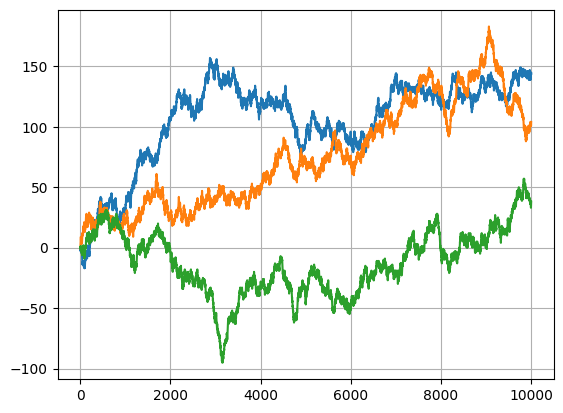

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def caminata(pasos):
  c=[0]
  for i in range(pasos):
    c.append(c[-1]+np.random.choice([1,-1]))
  return c

N=3
for i in range(N):
  plt.plot(caminata(10000))
plt.grid()



Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [23]:
def caminata(pasos):
  c=0
  for i in range(pasos):
    c+=np.random.choice([1,-1])
  return c
ultima_posicion = caminata(10000)
print("Última posición:", ultima_posicion)

Última posición: 88


Simule 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [24]:
N=1000
caminatas=[]
for i in range(N):
  caminatas.append(caminata(10000))
B=np.array(caminatas)>0
B.mean()


np.float64(0.502)

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

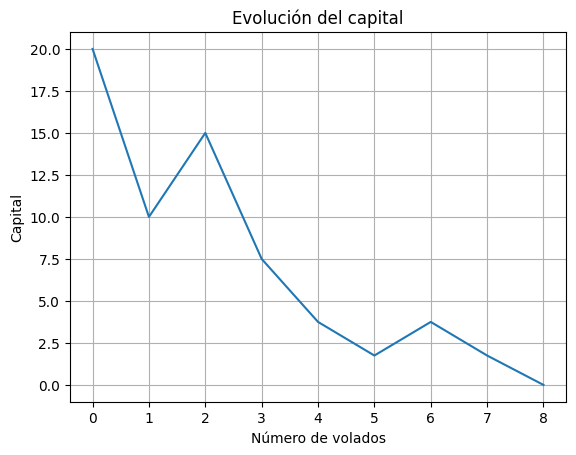

In [48]:
import numpy as np
import matplotlib.pyplot as plt

capital_inicial = 20
capital = capital_inicial
historial = [capital]

while capital > 0:
    if capital >= 6:
        apuesta = capital / 2
    else:
        apuesta = 2

    volado = np.random.choice([1, -1])

    capital = capital + volado * apuesta

    if capital <= 0:
        capital = 0
    historial.append(capital)

plt.plot(historial)
plt.title("Evolución del capital")
plt.xlabel("Número de volados")
plt.ylabel("Capital")
plt.grid()
plt.show()

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [49]:
import numpy as np

N = 10000
quiebra = []

for sim in range(N):
    capital_inicial = 20
    capital = capital_inicial
    while capital > 0:
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        volado = np.random.choice([1, -1])
        capital = capital + volado * apuesta

        if capital <= 0:
            capital = 0
    quiebra.append(sim + 1)

promedio = np.mean(quiebra)
print("Promedio de volados a quiebra (N=10000):", promedio)


Promedio de volados a quiebra (N=10000): 5000.5


3. Muestre un histograma del número de volados.

<Axes: ylabel='Frequency'>

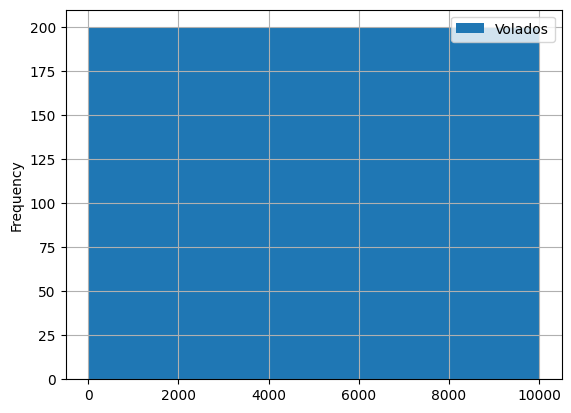

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

delta = pd.DataFrame(quiebra, columns=['Volados'])
delta.plot(kind='hist', bins=50, grid=True)
